<a href="https://colab.research.google.com/github/nonoumasy/honey-bee-production-1998-2012/blob/master/Honey_Bee_Production_19989_2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas-profiling
!pip install -U plotly

     |████████████████████████████████| 7.1MB 2.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


This notebook will ...:

1. problem statement
2. Dataset
3. Exploratory Data Analysis(EDA)
4. Feature 
5. Model Selection
6. Model Validation
7. Result

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px

%matplotlib inline

# Dataset

Dataset Description

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|honey_df|US State|
|**numcol**|float64|honey_df|Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year|
|**yieldpercol**|int64|honey_df|Honey yield per colony. Unit is pounds|
|**totalprod**|float64|honey_df|Total production (numcol x yieldpercol). Unit is pounds|
|**stocks**|float64|honey_df|Refers to stocks held by producers. Unit is pounds|
|**priceperlb**|float64|honey_df|Refers to average price per pound based on expanded sales. Unit is dollars.|
|**prodvalue**|float64|honey_df|Value of production (totalprod x priceperlb). Unit is dollars.|
|**year**|int64|honey_df|Year (1998 - 2012)|

In [0]:
honey_df = pd.read_csv('/content/honeyproduction.csv')

In [8]:
honey_df.head(2)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


In [52]:
for col in honey_df.columns:
  print(col)

state
numcol
yieldpercol
totalprod
stocks
priceperlb
prodvalue
year


# Pandas Profiling

In [13]:
pp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,626
Total Missing (%),0.0%
Total size in memory,39.2 KiB
Average record size in memory,64.2 B
Numeric,5
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import 

Data Source:
https://www.kaggle.com/jessicali9530/honey-production

# EDA

In [14]:
#some statistics by state
honey_df.groupby('state')['numcol', 'yieldpercol', 'stocks', 'priceperlb', 'prodvalue'].agg(['mean', 'min', 'max']).round(2).style.highlight_max(color='yellow').highlight_min(color='red')
  #.style.background_gradient(cmap='viridis')


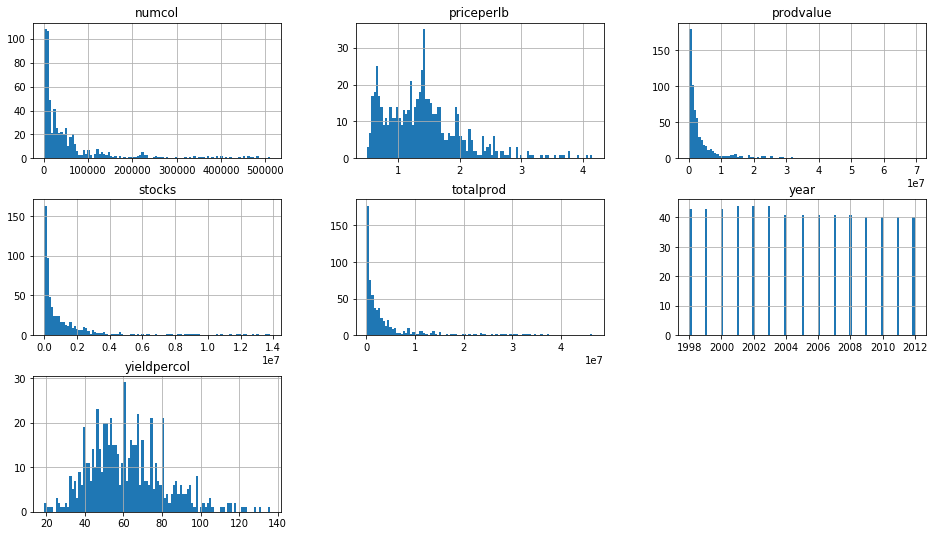

In [15]:
#distribution of variables
honey_df.hist(bins=100, figsize=(16,9));
plt.title('histogram');

We notice some of the variable distribution are not uniformly distributed. There are many reasons why you would want to transform your data to be uniformly distributed. One reason is that it normally(no pun) improves model prediction. So we will have to do this transformation later in the Feature Engineering step.

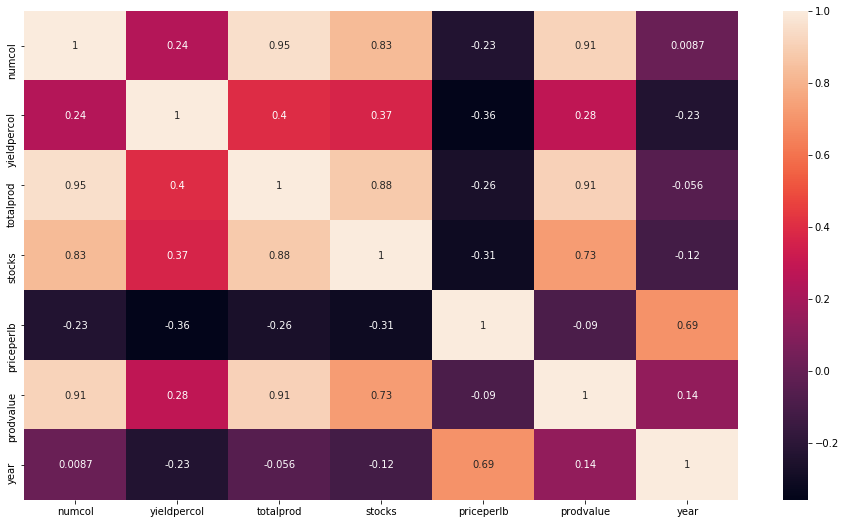

In [16]:
#correlation of variables
plt.figure(figsize=(16,9))
sns.heatmap(honey_df.corr(), annot=True)
plt.show()

# Time Series Analysis


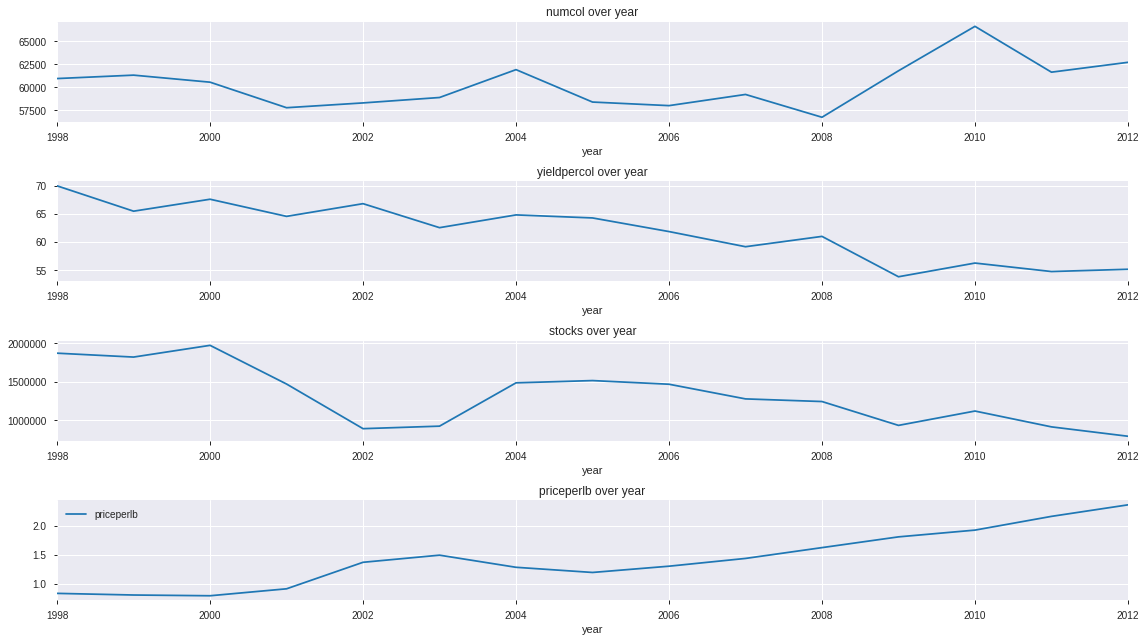

In [73]:
# Groupby by year
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
honey_df.groupby('year')['numcol'].mean().plot(figsize=(16,9), ax=ax1,)
ax1.set_title("numcol over year")
honey_df.groupby('year')['yieldpercol'].mean().plot(figsize=(16,9), ax=ax2)
ax2.set_title("yieldpercol over year")
honey_df.groupby('year')['stocks'].mean().plot(figsize=(16,9), ax=ax3)
ax3.set_title("stocks over year")
honey_df.groupby('year')['priceperlb'].mean().plot(figsize=(16,9), ax=ax4)
ax4.set_title("priceperlb over year")
fig.tight_layout(pad=1)
plt.legend()

# Geospatial Analysis(Map)

In [67]:
pd.crosstab(index=honey_df.year,
            columns=honey_df.state,
            values=honey_df.totalprod,
            aggfunc='sum',
            margins=True,
            )#.style.background_gradient('GnBu')

state,AL,AR,AZ,CA,CO,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NJ,NM,NV,NY,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998,1136000.0,3445000.0,3300000.0,37350000.0,1944000.0,22540000.0,4200000.0,944000.0,3900000.0,6000000.0,639000.0,828000.0,736000.0,150000.0,4551000.0,308000.0,260000.0,6800000.0,11060000.0,1518000.0,1548000.0,14030000.0,472000.0,29440000.0,4480000.0,539000.0,770000.0,460000.0,5200000.0,1404000.0,204000.0,2250000.0,1716000.0,NaN,21375000.0,448000.0,7007000.0,1740000.0,296000.0,384000.0,2958000.0,8099000.0,330000.0,2760000.0,2.195190e+08
1999,1156000.0,4628000.0,3224000.0,27900000.0,2052000.0,23256000.0,3315000.0,640000.0,2600000.0,5760000.0,594000.0,810000.0,871000.0,150000.0,5472000.0,276000.0,308000.0,6205000.0,11890000.0,1560000.0,1314000.0,8540000.0,414000.0,26775000.0,4466000.0,440000.0,780000.0,405000.0,4830000.0,1480000.0,270000.0,2565000.0,1680000.0,NaN,23296000.0,408000.0,8748000.0,1170000.0,245000.0,396000.0,2600000.0,6000000.0,234000.0,2664000.0,2.023870e+08
2000,1248000.0,4836000.0,2360000.0,30800000.0,1740000.0,24360000.0,3135000.0,784000.0,2010000.0,4700000.0,488000.0,520000.0,1020000.0,192000.0,4042000.0,276000.0,231000.0,5400000.0,13500000.0,1725000.0,1224000.0,10912000.0,539000.0,34500000.0,4350000.0,385000.0,960000.0,350000.0,4640000.0,1170000.0,245000.0,2448000.0,1125000.0,NaN,28435000.0,549000.0,8295000.0,984000.0,294000.0,413000.0,2808000.0,7560000.0,378000.0,3627000.0,2.195580e+08
2001,1022000.0,4900000.0,2537000.0,28060000.0,1430000.0,22000000.0,3135000.0,696000.0,1683000.0,4600000.0,456000.0,532000.0,663000.0,312000.0,4770000.0,184000.0,220000.0,4560000.0,10935000.0,1342000.0,1122000.0,13872000.0,572000.0,26880000.0,2064000.0,374000.0,700000.0,450000.0,3710000.0,1458000.0,188000.0,1936000.0,1482000.0,280000.0,15275000.0,472000.0,7663000.0,874000.0,468000.0,567000.0,2496000.0,5427000.0,455000.0,2926000.0,1.857480e+08
2002,1032000.0,3960000.0,2394000.0,23500000.0,1440000.0,20460000.0,2600000.0,952000.0,2310000.0,5700000.0,720000.0,496000.0,884000.0,270000.0,4340000.0,138000.0,451000.0,5544000.0,8541000.0,900000.0,1404000.0,8442000.0,672000.0,24000000.0,3225000.0,440000.0,484000.0,558000.0,5880000.0,1260000.0,159000.0,2107000.0,1653000.0,470000.0,11475000.0,488000.0,7638000.0,1298000.0,304000.0,623000.0,2550000.0,6650000.0,459000.0,2394000.0,1.712650e+08
2003,1066000.0,3000000.0,2520000.0,32160000.0,2064000.0,14910000.0,3380000.0,798000.0,1888000.0,4600000.0,420000.0,280000.0,912000.0,240000.0,3060000.0,84000.0,264000.0,4810000.0,9960000.0,901000.0,1449000.0,9570000.0,440000.0,29580000.0,3330000.0,190000.0,246000.0,384000.0,4824000.0,750000.0,141000.0,2142000.0,1350000.0,280000.0,15050000.0,240000.0,9380000.0,1425000.0,222000.0,581000.0,3248000.0,5698000.0,376000.0,3159000.0,1.813720e+08
2004,1044000.0,2280000.0,1760000.0,17550000.0,1840000.0,20090000.0,3087000.0,768000.0,2345000.0,6300000.0,385000.0,413000.0,1120000.0,280000.0,3430000.0,NaN,217000.0,4355000.0,10125000.0,656000.0,1170000.0,10780000.0,360000.0,30420000.0,4539000.0,324000.0,352000.0,770000.0,4288000.0,928000.0,NaN,2268000.0,1620000.0,NaN,22575000.0,324000.0,8816000.0,1680000.0,266000.0,408000.0,3528000.0,5848000.0,495000.0,2925000.0,1.827290e+08
2005,858000.0,2484000.0,1800000.0,30000000.0,1960000.0,13760000.0,2891000.0,1179000.0,2464000.0,3515000.0,680000.0,512000.0,800000.0,250000.0,3395000.0,NaN,208000.0,4420000.0,8880000.0,750000.0,1280000.0,8710000.0,540000.0,33670000.0,2720000.0,384000.0,343000.0,552000.0,4307000.0,1035000.0,NaN,1638000.0,1568000.0,NaN,17380000.0,385000.0,5964000.0,1080000.0,296000.0,546000.0,2805000.0,5312000.0,408000.0,2240000.0,1.739690e+08
2006,792000.0,2432000.0,1950000.0,19760000.0,2700000.0,13770000.0,4662000.0,930000.0,2184000.0,4180000.0,660000.0,378000.0,770000.0,280000.0,2700000.0,NaN,253000.0,3960000.0,10000000.0,690000.0,1372000.0,10428000.0,500000.0,25900000.0,3431000.0,324000.0,336000.0,333000.0,3712000.0,784000.0,

In [49]:
#groupby states
honey_df.groupby(['year', 'state'])['totalprod'].sum()

year  state
1998  AL        1136000.0
      AR        3445000.0
      AZ        3300000.0
      CA       37350000.0
      CO        1944000.0
                  ...    
2012  VT         240000.0
      WA        2542000.0
      WI        4140000.0
      WV         288000.0
      WY        2550000.0
Name: totalprod, Length: 626, dtype: float64

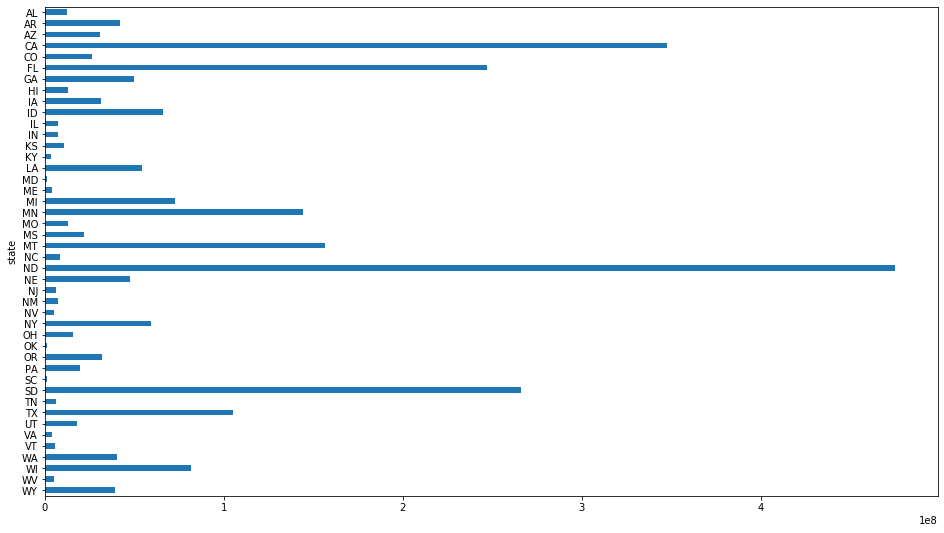

In [18]:
#groupby states
honey_df.groupby('state')['totalprod'].sum()[::-1].plot(kind='barh', figsize=(16,9));

In [0]:
states_url= 'https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-states.json'

In [73]:
#
fig = px.choropleth(honey_df, 
                    geojson=states_url, 
                    locations='state', 
                    #locationmode='USA-states',
                    color='totalprod',
                    color_continuous_scale="YlGnBu",
                    range_color=(100000, 35000000),
                    scope="usa",
                    labels={'totalprod':'Total Production'},
                    )

fig.show()

# Feature Engineering

In [0]:
#let's drop some columns that are collinear to improve the model
df.drop()

In [0]:
#standardization of the data

In [0]:
#normalization of the data